<a href="https://colab.research.google.com/github/AsadiAhmad/Gesture-Detection/blob/main/Code/Gesture_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Import Libraries

In [3]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import gdown

# Step 2: Download Resources

In [4]:
gdown.download(id="1D3ytIZ-ZMMd5MbvVbf2Sn5oZ1L0aQ9IG", output="pose_deploy_linevec_faster_4_stages.prototxt", quiet=False)
gdown.download(id="1f-fCSTg7qFHRVKGIptyPJsgNwRs4XDsK", output="pose_iter_160000.caffemodel", quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1D3ytIZ-ZMMd5MbvVbf2Sn5oZ1L0aQ9IG
To: /content/pose_deploy_linevec_faster_4_stages.prototxt
100%|██████████| 32.2k/32.2k [00:00<00:00, 38.9MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1f-fCSTg7qFHRVKGIptyPJsgNwRs4XDsK
From (redirected): https://drive.google.com/uc?id=1f-fCSTg7qFHRVKGIptyPJsgNwRs4XDsK&confirm=t&uuid=09e93bda-68ac-4c4e-8c37-2b14faf888cd
To: /content/pose_iter_160000.caffemodel
100%|██████████| 206M/206M [00:02<00:00, 77.0MB/s]


'pose_iter_160000.caffemodel'

In [5]:
!wget https://raw.githubusercontent.com/AsadiAhmad/Gesture-Detection/main/Pictures/standing_pose.jpg -O standing_pose.jpg
!wget https://raw.githubusercontent.com/AsadiAhmad/Gesture-Detection/main/Pictures/sitting_pose.jpg -O sitting_pose.jpg
!wget https://raw.githubusercontent.com/AsadiAhmad/Gesture-Detection/main/Pictures/laying_pose.jpg -O laying_pose.jpg

--2025-05-12 19:09:17--  https://raw.githubusercontent.com/AsadiAhmad/Gesture-Detection/main/Pictures/standing_pose.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63905 (62K) [image/jpeg]
Saving to: ‘standing_pose.jpg’

standing_pose.jpg   100%[===================>]  62.41K  --.-KB/s    in 0.005s  

2025-05-12 19:09:17 (13.5 MB/s) - ‘standing_pose.jpg’ saved [63905/63905]

--2025-05-12 19:09:17--  https://raw.githubusercontent.com/AsadiAhmad/Gesture-Detection/main/Pictures/sitting_pose.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200

# Step 3: Load Images

In [6]:
standing_pose = cv.imread("standing_pose.jpg")
sitting_pose = cv.imread("sitting_pose.jpg")
laying_pose = cv.imread("laying_pose.jpg")

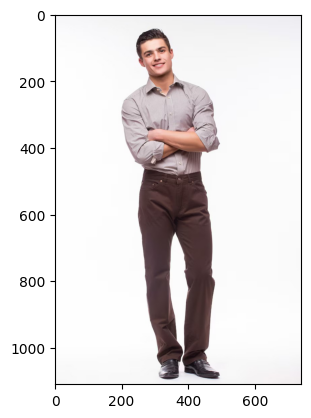

In [7]:
plt.imshow(standing_pose[...,::-1])

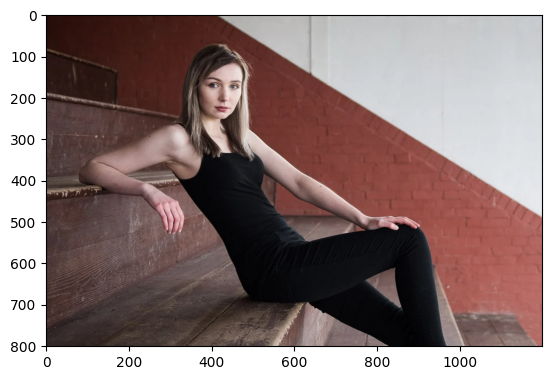

In [8]:
plt.imshow(sitting_pose[...,::-1])

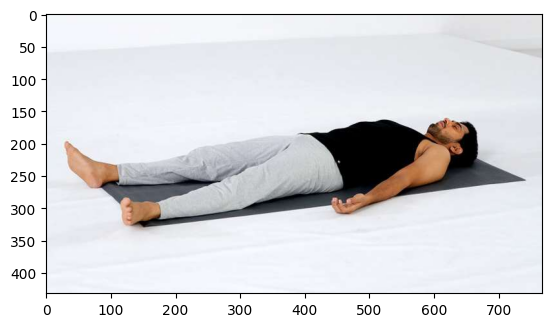

In [9]:
plt.imshow(laying_pose[...,::-1])

# Step 4: Load Models

In [10]:
protoFile = "pose_deploy_linevec_faster_4_stages.prototxt"
weightsFile = "pose_iter_160000.caffemodel"

net1 = cv.dnn.readNetFromCaffe(protoFile, weightsFile)
net2 = cv.dnn.readNetFromCaffe(protoFile, weightsFile)
net3 = cv.dnn.readNetFromCaffe(protoFile, weightsFile)

# Step 5: Convert image to blob

In [11]:
blob1 = cv.dnn.blobFromImage(standing_pose, 1.0 / 255, (368, 368), (0, 0, 0), swapRB=False, crop=False)
blob2 = cv.dnn.blobFromImage(sitting_pose, 1.0 / 255, (368, 368), (0, 0, 0), swapRB=False, crop=False)
blob3 = cv.dnn.blobFromImage(laying_pose, 1.0 / 255, (368, 368), (0, 0, 0), swapRB=False, crop=False)
net1.setInput(blob1)
net2.setInput(blob2)
net3.setInput(blob3)

# Step 6: Set Body Points

In [12]:
nPoints = 15
POSE_PAIRS = [[0,1], [1,2], [2,3], [3,4], [1,5], [5,6], [6,7], [1,14], [14,8], [8,9], [9,10], [14,11], [11,12], [12,13]]

# Step 7: Run Inference (forward pass)

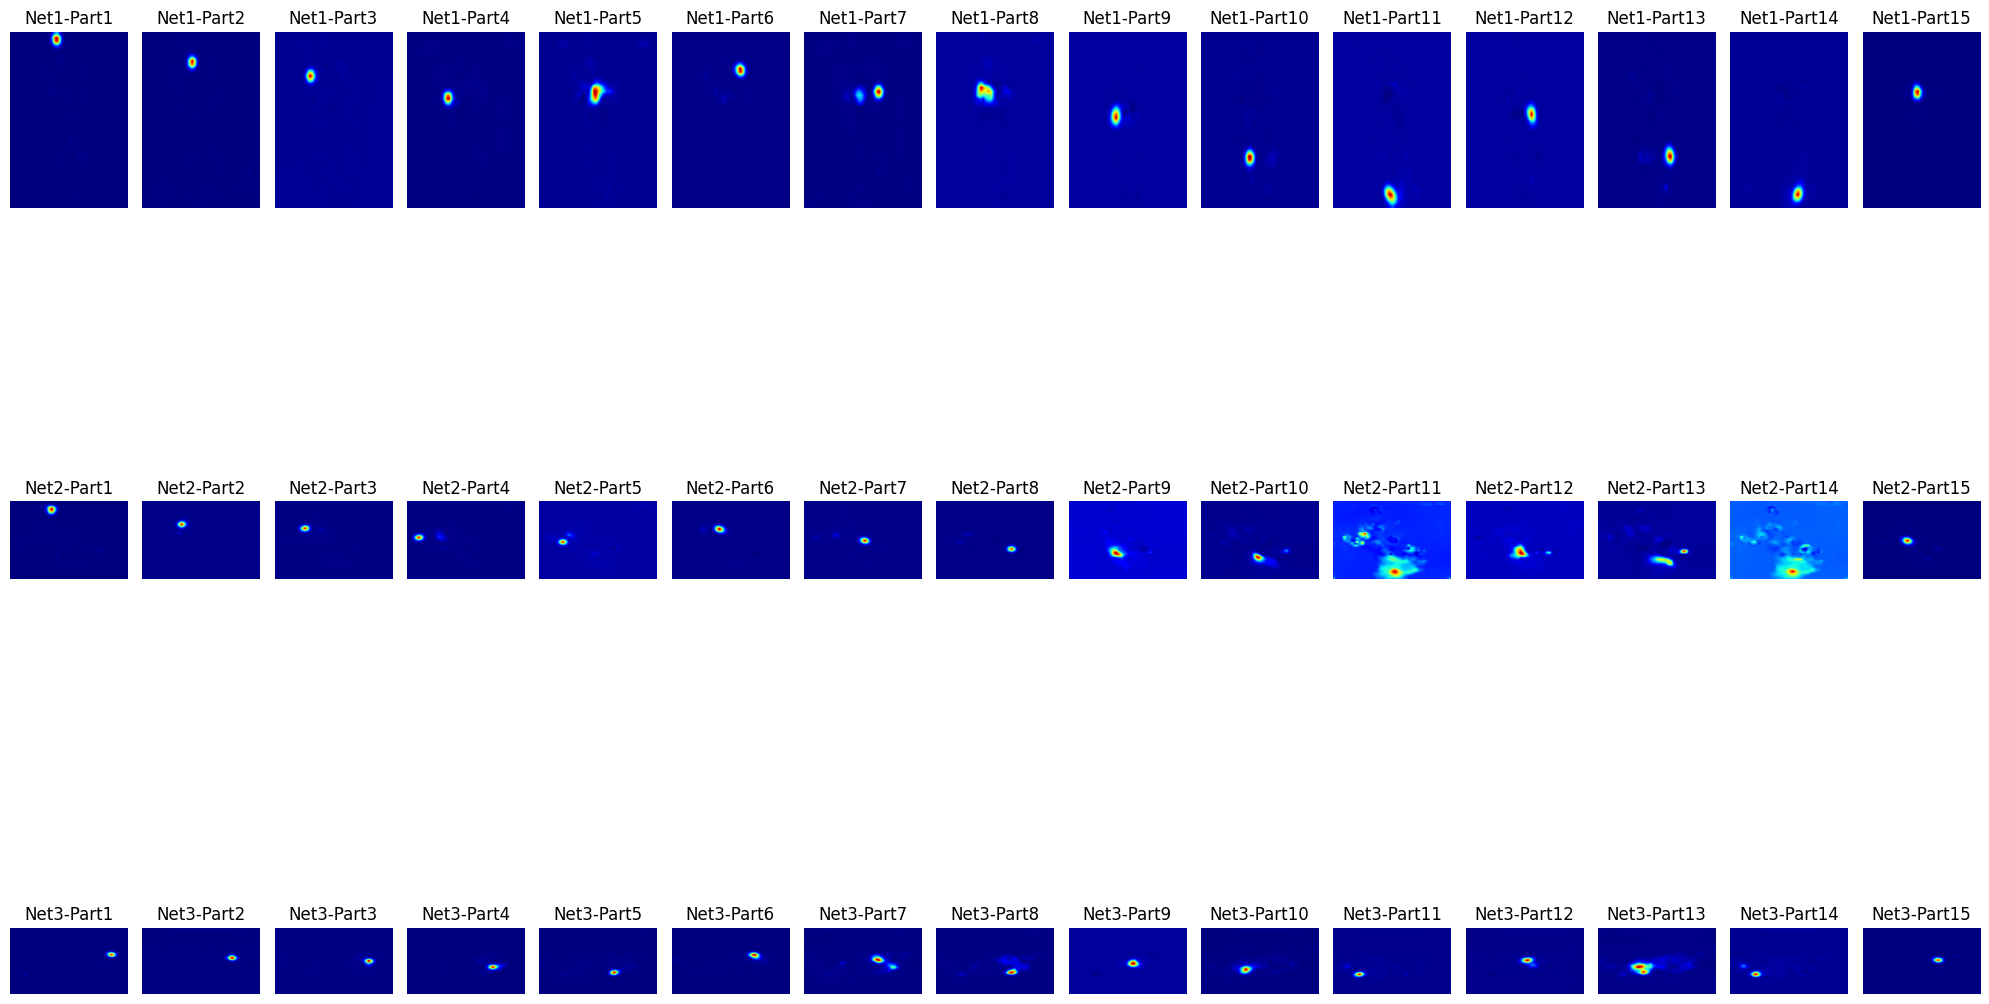

In [13]:
height1, width1, _ = standing_pose.shape
height2, width2, _ = sitting_pose.shape
height3, width3, _ = laying_pose.shape

output1 = net1.forward()
output2 = net2.forward()
output3 = net3.forward()

plt.figure(figsize=(20, 15))

for i in range(nPoints):
    probMap = output1[0, i, :, :]
    displayMap = cv.resize(probMap, (width1, height1), cv.INTER_LINEAR)
    plt.subplot(3, nPoints, i+1)
    plt.axis('off')
    plt.title(f'Net1-Part{i+1}')
    plt.imshow(displayMap, cmap='jet')

for i in range(nPoints):
    probMap = output2[0, i, :, :]
    displayMap = cv.resize(probMap, (width2, height2), cv.INTER_LINEAR)
    plt.subplot(3, nPoints, nPoints + i+1)
    plt.axis('off')
    plt.title(f'Net2-Part{i+1}')
    plt.imshow(displayMap, cmap='jet')

for i in range(nPoints):
    probMap = output3[0, i, :, :]
    displayMap = cv.resize(probMap, (width3, height3), cv.INTER_LINEAR)
    plt.subplot(3, nPoints, 2*nPoints + i+1)
    plt.axis('off')
    plt.title(f'Net3-Part{i+1}')
    plt.imshow(displayMap, cmap='jet')

plt.tight_layout()
plt.show()

# Step 7: Extract points

In [14]:
def extract_keypoints(output, height, width, nPoints=15, threshold=0.1):
    scaleX = float(width) / output.shape[3]
    scaleY = float(height) / output.shape[2]

    points = []

    for i in range(nPoints):
        probMap = output[0, i, :, :]
        _, prob, _, point = cv.minMaxLoc(probMap)

        x = scaleX * point[0]
        y = scaleY * point[1]

        if prob > threshold:
            points.append((int(x), int(y)))
        else:
            points.append(None)

    return points

In [ ]:
standing_points = extract_keypoints(output1, height1, width1)
sitting_points = extract_keypoints(output2, height2, width2)
laying_points = extract_keypoints(output3, height3, width3)

# Step 8: Display Points & Skeleton

In [15]:
def visualize_pose(pose_img, points, POSE_PAIRS, title=""):
    imPoints = pose_img.copy()
    imSkeleton = pose_img.copy()

    for i, p in enumerate(points):
        if p is not None:
            cv.circle(imPoints, p, 8, (255, 255, 0), thickness=-1, lineType=cv.FILLED)
            cv.putText(imPoints, f"{i}", p, cv.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2, lineType=cv.LINE_AA)

    for pair in POSE_PAIRS:
        partA, partB = pair
        if points[partA] and points[partB]:
            cv.line(imSkeleton, points[partA], points[partB], (255, 255, 0), 2)
            cv.circle(imSkeleton, points[partA], 8, (255, 0, 0), thickness=-1, lineType=cv.FILLED)

    plt.figure(figsize=(20, 10))

    plt.subplot(1, 2, 1)
    plt.imshow(cv.cvtColor(imPoints, cv.COLOR_BGR2RGB))
    plt.title(f"{title} - Keypoints")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv.cvtColor(imSkeleton, cv.COLOR_BGR2RGB))
    plt.title(f"{title} - Skeleton")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

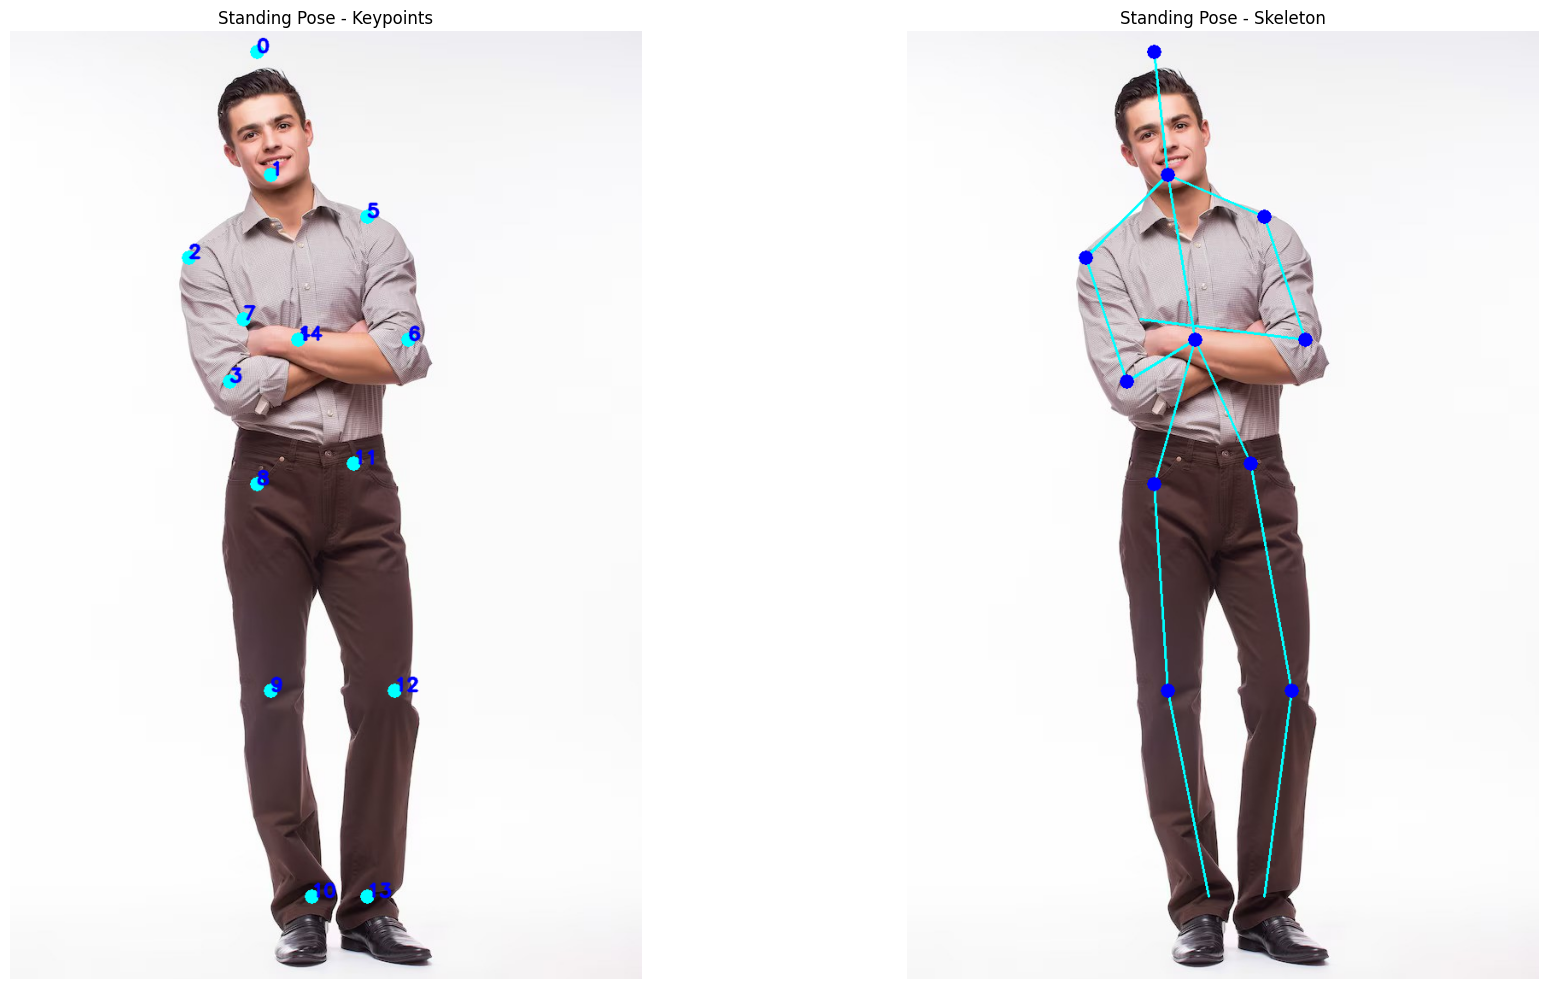

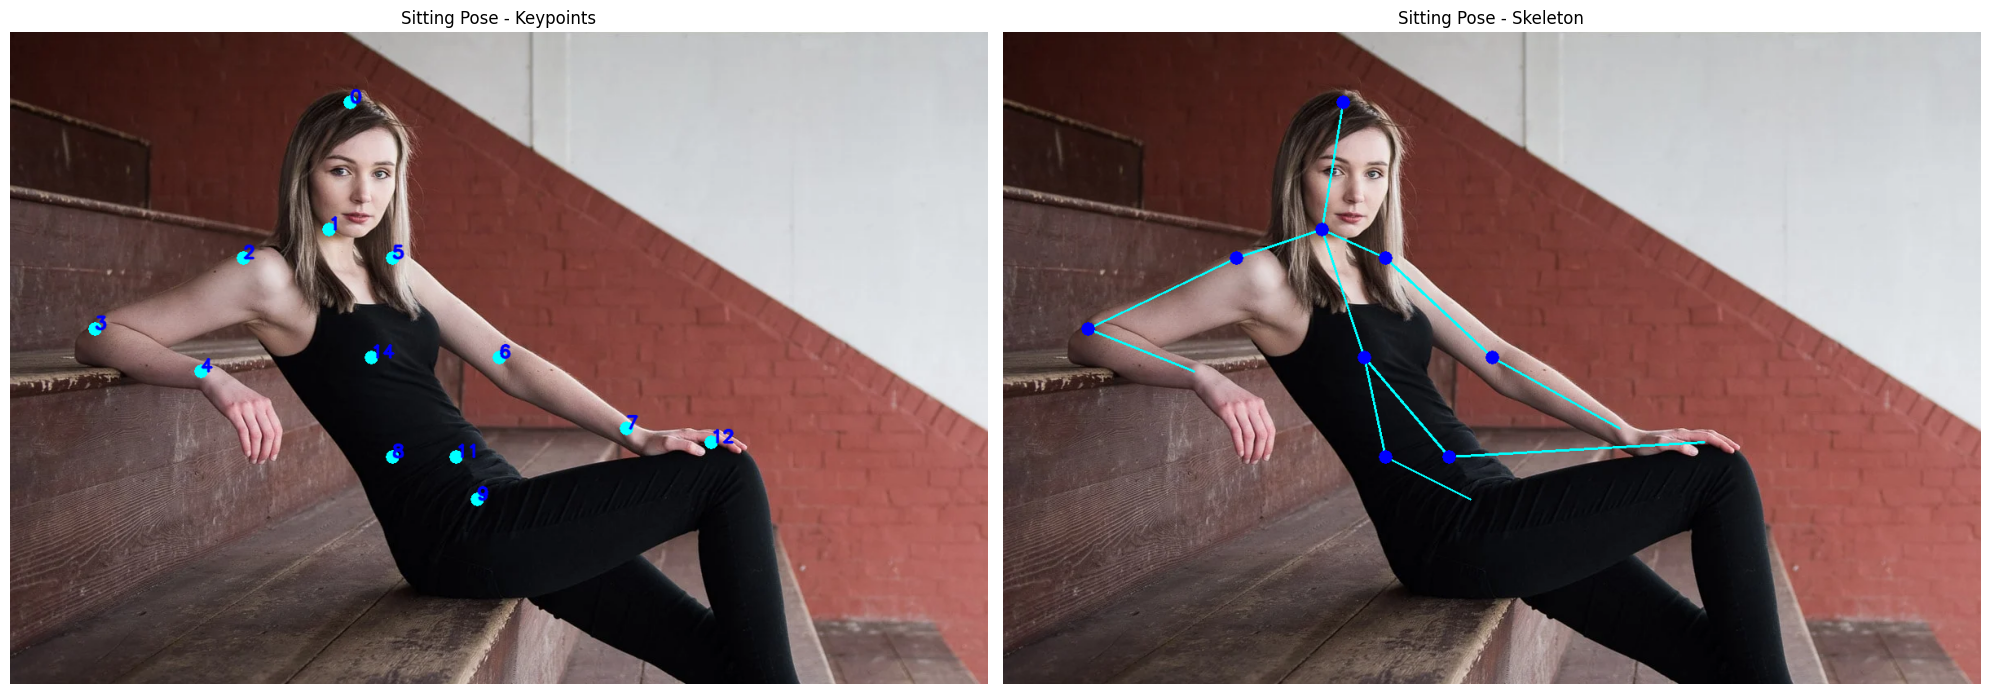

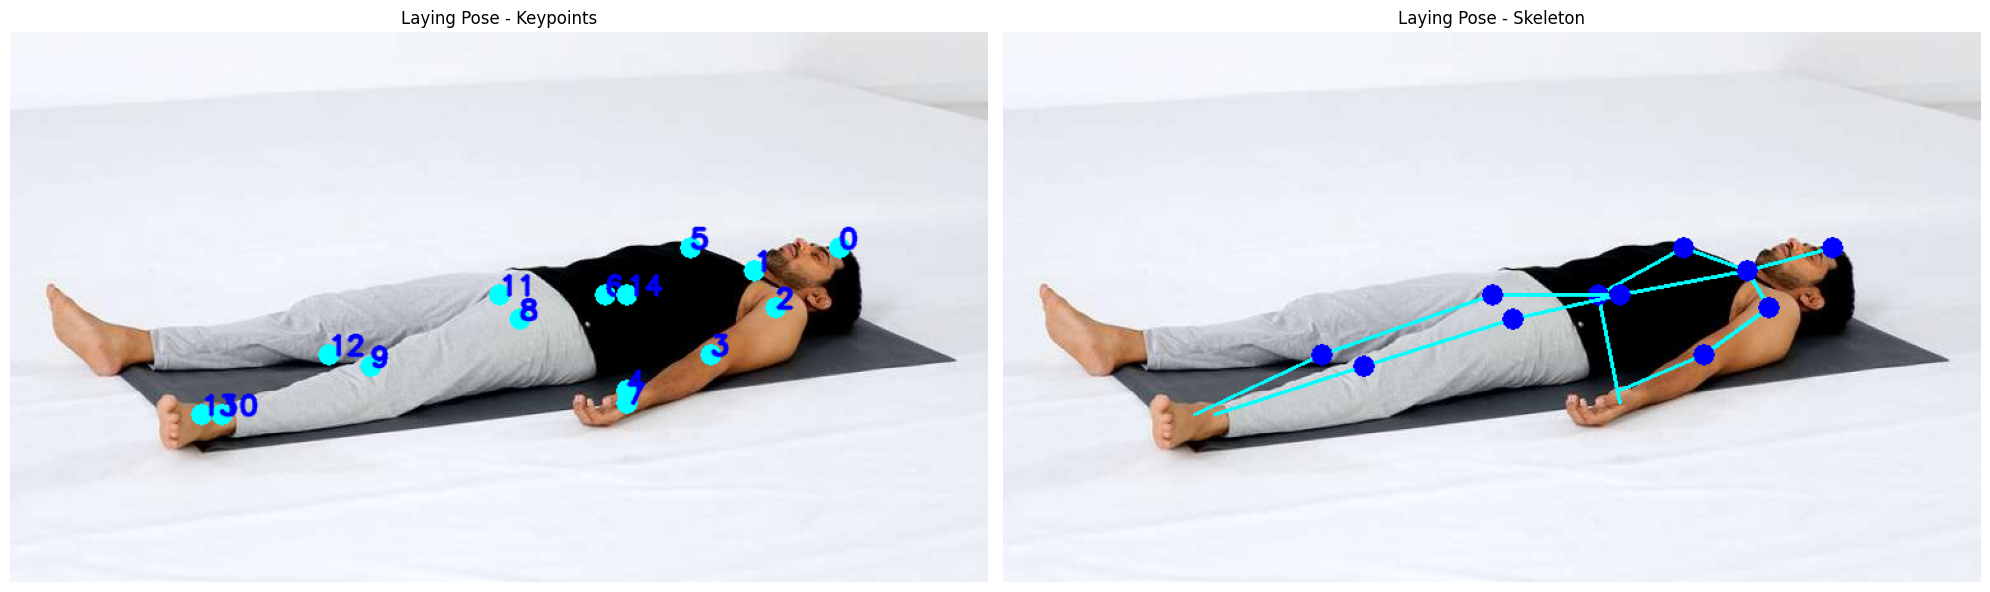

In [16]:
visualize_pose(standing_pose, standing_points, POSE_PAIRS, "Standing Pose")
visualize_pose(sitting_pose, sitting_points, POSE_PAIRS, "Sitting Pose")
visualize_pose(laying_pose, laying_points, POSE_PAIRS, "Laying Pose")

# Step 9: Classifying

In [19]:
def classify_pose(points):
    try:
        head = points[0]
        neck = points[1]
        mid_hip = points[14]
        right_knee = points[9]
        left_knee = points[12]
        right_ankle = points[10]
        left_ankle = points[13]

        if not neck or not mid_hip:
            return "none"
        torso_len = abs(mid_hip[1] - neck[1])
        leg_len = 0
        count = 0

        for knee, ankle in [(right_knee, right_ankle), (left_knee, left_ankle)]:
            if knee and ankle:
                leg_len += abs(ankle[1] - knee[1])
                count += 1
        leg_len = leg_len / count if count else 0

        # Rule 1: Standing → tall person with long legs and vertical posture
        if torso_len > 50 and leg_len > 50:
            if neck[1] < mid_hip[1] < right_knee[1]:
                return "standing"

        # Rule 2: Sitting → knees close to hips (legs bent)
        if right_knee and mid_hip and abs(right_knee[1] - mid_hip[1]) < 40:
            return "sitting"

        # Rule 3: Laying → head, neck, and hip nearly horizontal
        if head and neck and abs(neck[1] - head[1]) < 20 and abs(neck[1] - mid_hip[1]) < 20:
            return "laying"

    except:
        return "none"

    return "none"

In [20]:
label1 = classify_pose(standing_points)
label2 = classify_pose(sitting_points)
label3 = classify_pose(laying_points)
print("Detected posture 1:", label1)
print("Detected posture 2:", label2)
print("Detected posture 3:", label3)


Detected posture 1: standing
Detected posture 2: none
Detected posture 3: laying
